# Importing modules

In [117]:
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Input data

In [118]:
dataframe = pd.read_csv('default_of_credit_card_clients.csv',delimiter=";")

# Preparation of data and correlation

In [119]:
dataframe=dataframe.drop([0])
dataframe.apply(pd.to_numeric)
print(dataframe.isnull().mean()*100)
dataframe.corr()

Unnamed: 0    0.0
X1            0.0
X2            0.0
X3            0.0
X4            0.0
X5            0.0
X6            0.0
X7            0.0
X8            0.0
X9            0.0
X10           0.0
X11           0.0
X12           0.0
X13           0.0
X14           0.0
X15           0.0
X16           0.0
X17           0.0
X18           0.0
X19           0.0
X20           0.0
X21           0.0
X22           0.0
X23           0.0
Y             0.0
dtype: float64


,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
Unnamed: 0,1.000000,0.026179,0.018497,0.039177,-0.029079,0.018678,-0.030575,-0.011215,-0.018494,-0.002735,...,0.040351,0.016705,0.016730,0.009742,0.008406,0.039151,0.007793,0.000652,0.003000,-0.013952
X1,0.026179,1.000000,0.024755,-0.219161,-0.108139,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,...,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520
X2,0.018497,0.024755,1.000000,0.014232,-0.031389,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,...,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766,-0.039961
X3,0.039177,-0.219161,0.014232,1.000000,-0.143464,0.175061,0.105364,0.121566,0.114025,0.108793,...,-0.000451,-0.007567,-0.009099,-0.037456,-0.030038,-0.039943,-0.038218,-0.040358,-0.037200,0.028006
X4,-0.029079,-0.108139,-0.031389,-0.143464,1.000000,-0.414170,0.019917,0.024199,0.032688,0.033122,...,-0.023344,-0.025393,-0.021207,-0.005979,-0.008093,-0.003541,-0.012659,-0.001205,-0.006641,-0.024339
X5,0.018678,0.144713,-0.090874,0.175061,-0.414170,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,...,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890
X6,-0.030575,-0.271214,-0.057643,0.105364,0.019917,-0.039447,1.000000,0.672164,0.574245,0.538841,...,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673,0.324794
X7,-0.011215,-0.296382,-0.070771,0.121566,0.024199,-0.050148,0.672164,1.000000,0.766552,0.662067,...,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500,0.263551
X8,-0.018494,-0.286123,-0.066096,0.114025,0.032688,-0.053048,0.574245,0.766552,1.000000,0.777359,...,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861,0.235253
X9,-0.002735,-0.267460,-0.060173,0.108793,0.033122,-0.049722,0.538841,0.662067,0.777359,1.000000,...,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565,0.216614


### There are no missing values. Furthermore, the features X6, X7, X8, X9, X10 and X11 show the higest correlation with y and are therefore chosen for the analysis.

# Looking for outliers

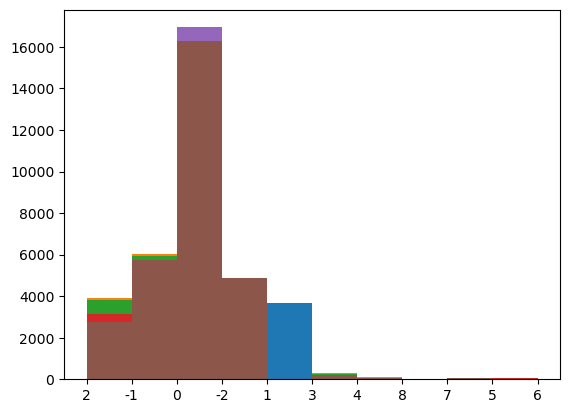

In [120]:
for i in range (6,12):
    plt.hist(dataframe[f'X{i}'])
features=['X6','X7','X8','X9','X10','X11']
target=['Y']

### The data doesn't show unusal behavior with regard to outliers.

# Train test split and undersampling to improve roc_auc score

In [121]:
X, y = dataframe[features], dataframe[target]

X_train_initial, X_test, y_train_initial, y_test = train_test_split(X, y, test_size=0.40, random_state=0, stratify=y)
under_sampling = RandomUnderSampler(random_state=42)

X_train, y_train = under_sampling.fit_resample(X_train_initial, y_train_initial)

# Scaling the data

In [122]:
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

# Random forest model with grid search

In [123]:
random_forest = RandomForestClassifier(n_estimators=2000, n_jobs=-1)
params_rf = {'max_depth': [1,3],
             'min_samples_leaf': [3,4]}
rf_gridsearch = GridSearchCV(random_forest,
                             params_rf,
                             scoring='f1_micro',
                             cv=5,
                             verbose=10, n_jobs=-1)
rf_gridsearch.fit(X_train_standardized, y_train.values.ravel())
print('\nBest hyperparameter:', rf_gridsearch.best_params_)
rf_model = rf_gridsearch.best_estimator_

Fitting 5 folds for each of 4 candidates, totalling 20 fits

Best hyperparameter: {'max_depth': 3, 'min_samples_leaf': 4}


# Predicting based on test data

In [124]:
predictions_rf_test = rf_model.predict(X_test_standardized)

# Evaluating the model

In [125]:
f1 = f1_score(y_test, predictions_rf_test,average='micro')
roc_auc = roc_auc_score(y_test, predictions_rf_test,multi_class='ovr')
print(f'F1 score: {f1}')
print(f'ROC AUC score: {roc_auc}')

F1 score: 0.7779166666666667
ROC AUC score: 0.7001368392653463


# The F1 score and ROC AUC score are both rather satisfying and show a decent quality. 